In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/advertising_ef naive.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Wrightburgh,Female,Tunisia,0
1,NaN,31.0,68441.85,193.77,West Jodi,Male,Nauru,0
2,69.47,26.0,59785.94,236.50,Davidton,Female,San Marino,0
3,74.15,29.0,54806.18,245.89,West Terrifurt,Male,Italy,0
4,68.37,35.0,73889.99,225.58,South Manuel,Female,Iceland,0


In [ ]:
#changing catagorical columns in to numerical using label encoder
catagorical_colum=['City','Gender','Country']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in catagorical_colum:
  df[column]=le.fit_transform(df[column])


In [ ]:
#looking for null values in dataframe
df.isnull().sum()


,0
Daily Time Spent on Site,4
Age,11
Area Income,11
Daily Internet Usage,4
City,0
Gender,0
Country,0
Clicked on Ad,0


In [ ]:
columns_to_fill = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'City', 'Country']
for col in columns_to_fill:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values have been handled successfully.")


Missing values have been handled successfully.


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,65.086848,35.908821,54685.124153,179.753112,487.231913,0.479683,117.061447,0.501487
std,15.895903,8.739371,13560.812908,44.074826,280.120633,0.499835,70.933236,0.500246
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000,0.000000,0.000000
25%,51.380000,29.000000,46653.750000,138.550000,247.000000,0.000000,55.000000,0.000000
50%,68.470000,35.000000,56791.750000,182.650000,486.000000,0.000000,115.000000,1.000000
75%,78.640000,42.000000,65186.580000,218.790000,729.000000,1.000000,181.000000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,961.000000,1.000000,237.000000,1.000000


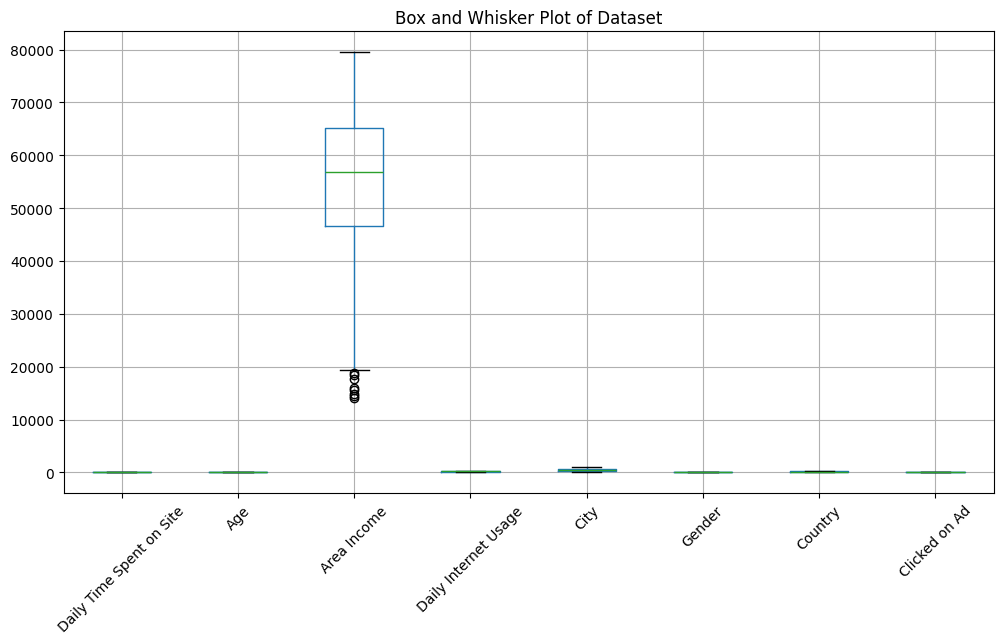

In [ ]:
#looking for outliers if any
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Box and Whisker Plot of Dataset')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#treating outliers
for columns in df.columns:
  Q1=df[columns].quantile(0.25)
  Q3=df[columns].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df[columns]=np.where(df[columns]<lower_bound,lower_bound,df[columns])
  df[columns]=np.where(df[columns]>upper_bound,upper_bound,df[columns])


NameError: name 'df' is not defined

In [ ]:
x=df.drop('Clicked on Ad',axis=1)
y=df['Clicked on Ad']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
#importing imp libraries
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#splitting the data in naive bayes types
continuous_features = ['Age', 'Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']
categorical_features = ['City', 'Country']
binary_features = ['Gender']

In [ ]:
#we need to standerize the data in GaussianNB
scalar=StandardScaler()
x_train_gnb=scalar.fit_transform(x_train[continuous_features])
x_test_gnb=scalar.fit_transform(x_test[continuous_features])

In [ ]:
x_train_mnb=x_train[categorical_features]
x_test_mnb=x_test[categorical_features]
x_train_bnb=x_train[binary_features]
x_test_bnb=x_test[binary_features]

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train_gnb,y_train)
probs_gnb = gnb.predict_proba(x_test_gnb)#prdict the probability
y_pred_gnb = gnb.predict(x_test_gnb) # keep this for accuracy print
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

# Apply Multinomial Naïve Bayes
mnb = MultinomialNB()
mnb.fit(x_train_mnb, y_train)
probs_mnb = mnb.predict_proba(x_test_mnb) # Use predict_proba to get probabilities
y_pred_mnb = mnb.predict(x_test_mnb) # keep this for accuracy print
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))

bnb = BernoulliNB()
bnb.fit(x_train_bnb, y_train)
probs_bnb = bnb.predict_proba(x_test_bnb) # Use predict_proba to get probabilities
y_pred_bnb = bnb.predict(x_test_bnb)  # keep this for accuracy print
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print(classification_report(y_test, y_pred_bnb))
# Ensemble Using Probability Multiplication
ensemble_probs = probs_gnb * probs_mnb * probs_bnb  # Multiply probabilities
ensemble_probs = ensemble_probs / ensemble_probs.sum(axis=1, keepdims=True)  # Normalize
final_predictions = np.argmax(ensemble_probs, axis=1)  # Final predictions

# Accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, final_predictions)

# Print accuracies
print("Gaussian Naïve Bayes Accuracy:", accuracy_score(y_test, np.argmax(probs_gnb, axis=1))) #Fixed the accuracy calculation for print statement
print("Multinomial Naïve Bayes Accuracy:", accuracy_score(y_test, np.argmax(probs_mnb, axis=1))) #Fixed the accuracy calculation for print statement
print("Bernoulli Naïve Bayes Accuracy:", accuracy_score(y_test, np.argmax(probs_bnb, axis=1))) #Fixed the accuracy calculation for print statement
print("Ensemble Model Accuracy:", ensemble_accuracy)

print(classification_report(y_test, final_predictions))

GaussianNB Accuracy: 0.9653465346534653
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96        96
         1.0       0.97      0.96      0.97       106

    accuracy                           0.97       202
   macro avg       0.97      0.97      0.97       202
weighted avg       0.97      0.97      0.97       202

MultinomialNB Accuracy: 0.43564356435643564
              precision    recall  f1-score   support

         0.0       0.41      0.41      0.41        96
         1.0       0.46      0.46      0.46       106

    accuracy                           0.44       202
   macro avg       0.43      0.43      0.43       202
weighted avg       0.44      0.44      0.44       202

BernoulliNB Accuracy: 0.5297029702970297
              precision    recall  f1-score   support

         0.0       0.50      0.57      0.54        96
         1.0       0.56      0.49      0.52       106

    accuracy                           0.53       202
   

In [ ]:
# Ensemble Using Probability Multiplication
ensemble_probs = probs_gnb * probs_mnb * probs_bnb  # Multiply probabilities
ensemble_probs = ensemble_probs / ensemble_probs.sum(axis=1, keepdims=True)  # Normalize
final_predictions = np.argmax(ensemble_probs, axis=1)  # Final predictions

# Accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, final_predictions)

# Print accuracies
print("Gaussian Naïve Bayes Accuracy:", accuracy_score(y_test, np.argmax(probs_gnb, axis=1)))
print("Multinomial Naïve Bayes Accuracy:", accuracy_score(y_test, np.argmax(probs_mnb, axis=1)))
print("Bernoulli Naïve Bayes Accuracy:", accuracy_score(y_test, np.argmax(probs_bnb, axis=1)))
print("Ensemble Model Accuracy:", ensemble_accuracy)

print(classification_report(y_test, final_predictions))


Gaussian Naïve Bayes Accuracy: 0.9653465346534653
Multinomial Naïve Bayes Accuracy: 0.43564356435643564
Bernoulli Naïve Bayes Accuracy: 0.5297029702970297
Ensemble Model Accuracy: 0.9405940594059405
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        96
         1.0       0.94      0.94      0.94       106

    accuracy                           0.94       202
   macro avg       0.94      0.94      0.94       202
weighted avg       0.94      0.94      0.94       202

